**Proyecto:** Analisis de Datos Ventas de Negocio

**Autora:** Victoria Abendaño

**Fecha:** 9 de Mayo

Ejecutado en Jupyterlab Localmente

In [1]:
import os

print("Ejecutado localmente en JupyterLab")
print("Sistema operativo:", os.name)


Ejecutado localmente en JupyterLab
Sistema operativo: posix


Escogi un dataset descargado de Kaggle con 3400 datos, este conjunto de datos es de ventas de un negocio de moda que nos indica datos relevantes del negocio como metodo de pago, el articulo comprado,etc.

Inicio importando librerias como pandas y numpy, luego cargo el dataset en un archivo csv.

In [2]:
# Importación de librerias
import pandas as pd
import numpy as np

# Cargo el archivo CSV
datos_ventas= pd.read_csv('Fashion_Retail_Sales.csv', encoding='latin1')

# Cantidad de datos en el dataset
datos_ventas.shape

(3400, 6)

Aqui presento la cabecera del dataset

In [3]:
datos_ventas.head(50)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card
6,4055,Jacket,2571.0,2023-07-08,1.3,Cash
7,3973,Trousers,2419.0,2022-11-10,4.6,Cash
8,4044,Jeans,4771.0,2023-05-19,4.1,Cash
9,4010,Loafers,4233.0,2023-06-11,NaN,Credit Card


Al revisar el dataset me di cuenta que necesitaba hacer una limpieza para manejar los datos faltantes de las columnas Monto Compra (Purchase Amount (USD)) y la Calificación de los Clientes (Review Rating), ya que (Purchase Amount (USD)) contiene datos númericos tipo 4619.0 y algunas celdas estan vacias. En este caso coloque 0 donde no habia datos. (Review Rating) tiene datos de tipo 2.0, 4.0 pero estan definidos como fechas y otros datos estan variados, entonces aqui hice la respestiva limpieza de datos.

In [4]:
# Convierto los valores a númericos, en caso de que halla valores no convertibles como simbolos, se coloca NAN y el codigo sigue su curso
datos_ventas['Purchase Amount (USD)'] = pd.to_numeric(datos_ventas['Purchase Amount (USD)'], errors='coerce').fillna(0).astype('float32')

# Saco una media de los rating para redondearlos a valores enteros, limitando los ratings en la escala de 0 a 5
datos_ventas['Review Rating'] = datos_ventas['Review Rating'].clip(0.0, 5.0).fillna(0).round(0).astype('int8')

# Visialización de los datos limpios
datos_ventas.head(50)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,0,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4,Cash
3,4097,Leggings,3126.0,2023-03-15,3,Cash
4,3997,Wallet,3003.0,2022-11-27,5,Cash
5,4080,Onesie,2914.0,2022-12-11,4,Credit Card
6,4055,Jacket,2571.0,2023-07-08,1,Cash
7,3973,Trousers,2419.0,2022-11-10,5,Cash
8,4044,Jeans,4771.0,2023-05-19,4,Cash
9,4010,Loafers,4233.0,2023-06-11,0,Credit Card


**Columna Año Compra**

Una vez que ya tengo listos los datos, procedi agregar columnas al dataframe, empiezo con la creación de la columna Año Compra, extrayendo solo el año desde la fecha.

In [5]:
# Extraigo el Año
datos_ventas['Año Compra']= pd.to_datetime(datos_ventas['Date Purchase'], errors='coerce').dt.year

# Relleno los años faltantes con cero y convierto a entero.
datos_ventas['Año Compra']= datos_ventas['Año Compra'].fillna(0).astype(int)

# Visialización de los datos
datos_ventas.head(50)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Año Compra
0,4018,Handbag,4619.0,2023-02-05,0,Credit Card,2023
1,4115,Tunic,2456.0,2023-07-11,2,Credit Card,2023
2,4019,Tank Top,2102.0,2023-03-23,4,Cash,2023
3,4097,Leggings,3126.0,2023-03-15,3,Cash,2023
4,3997,Wallet,3003.0,2022-11-27,5,Cash,2022
5,4080,Onesie,2914.0,2022-12-11,4,Credit Card,2022
6,4055,Jacket,2571.0,2023-07-08,1,Cash,2023
7,3973,Trousers,2419.0,2022-11-10,5,Cash,2022
8,4044,Jeans,4771.0,2023-05-19,4,Cash,2023
9,4010,Loafers,4233.0,2023-06-11,0,Credit Card,2023


**Columna Mes Compra**

Aqui de igual manera extraigo el mes de la fecha, listando los meses en orden, finalmente creo la columna Mes Compra.

In [6]:
#Creo una lista ordenada con los nombres de cada mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Tranformo la fecha a nombre de meses
datos_ventas['Mes Compra'] = pd.to_datetime(datos_ventas['Date Purchase'], errors='coerce').dt.month.apply(lambda x: meses[x-1] if pd.notnull(x) else '')

# Visialización de los datos
datos_ventas.head(50)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Año Compra,Mes Compra
0,4018,Handbag,4619.0,2023-02-05,0,Credit Card,2023,Febrero
1,4115,Tunic,2456.0,2023-07-11,2,Credit Card,2023,Julio
2,4019,Tank Top,2102.0,2023-03-23,4,Cash,2023,Marzo
3,4097,Leggings,3126.0,2023-03-15,3,Cash,2023,Marzo
4,3997,Wallet,3003.0,2022-11-27,5,Cash,2022,Noviembre
5,4080,Onesie,2914.0,2022-12-11,4,Credit Card,2022,Diciembre
6,4055,Jacket,2571.0,2023-07-08,1,Cash,2023,Julio
7,3973,Trousers,2419.0,2022-11-10,5,Cash,2022,Noviembre
8,4044,Jeans,4771.0,2023-05-19,4,Cash,2023,Mayo
9,4010,Loafers,4233.0,2023-06-11,0,Credit Card,2023,Junio


**Columna Categoria Compra**

En esta columna clasifico en 3 categorías los montos de compra, con condiciones booleanas si el monto es menor o igual a 200 seria una categoria Economica, si el monto es entre 201 y 1000 seria una categoria Media, si el monto es mayor a 1000 se lo catalagaria como Premium.



In [7]:
# Creo una lista con las 3 categorias
categorias = ['Economica', 'Media', 'Premium']

# Hago la lista booleana de condiciones para cada categoria
condicion= [
    datos_ventas['Purchase Amount (USD)'] <= 200,
    datos_ventas['Purchase Amount (USD)'].between(201, 1000),
    datos_ventas['Purchase Amount (USD)'] > 1000
]

# Asigno las categorias utilizando la libreria numpy
datos_ventas['Categoría Compra'] = np.select(condicion, categorias, default='No asignado')

# Visialización de los datos
datos_ventas.head(50)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Año Compra,Mes Compra,Categoría Compra
0,4018,Handbag,4619.0,2023-02-05,0,Credit Card,2023,Febrero,Premium
1,4115,Tunic,2456.0,2023-07-11,2,Credit Card,2023,Julio,Premium
2,4019,Tank Top,2102.0,2023-03-23,4,Cash,2023,Marzo,Premium
3,4097,Leggings,3126.0,2023-03-15,3,Cash,2023,Marzo,Premium
4,3997,Wallet,3003.0,2022-11-27,5,Cash,2022,Noviembre,Premium
5,4080,Onesie,2914.0,2022-12-11,4,Credit Card,2022,Diciembre,Premium
6,4055,Jacket,2571.0,2023-07-08,1,Cash,2023,Julio,Premium
7,3973,Trousers,2419.0,2022-11-10,5,Cash,2022,Noviembre,Premium
8,4044,Jeans,4771.0,2023-05-19,4,Cash,2023,Mayo,Premium
9,4010,Loafers,4233.0,2023-06-11,0,Credit Card,2023,Junio,Premium


**Columna Nivel de Satisfacción**

En esta columna clasifico en 3 categorias el nivel de satisfación del cliente si es igual a 5 la calificación seria muy satisfecho, si la calificación es de 3 a 4 seria satisfecho, si es menor a una calificación 3 seria insatisfecho.

In [8]:
#Creo una lista con las categorias
categorias = ['Muy satisfecho', 'Satisfecho', 'Insatisfecho']

#Creo una lista para cada categoria
condicion = [
    datos_ventas['Review Rating'] == 5,
    datos_ventas['Review Rating'].between(3, 4),
    datos_ventas['Review Rating'] < 3
]

#Asigno las categorias utilizando la libreria numpy
datos_ventas['Nivel Satisfacción'] = np.select(condicion, categorias, default='Sin calificar')

# Visialización de los datos
datos_ventas.head(50)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Año Compra,Mes Compra,Categoría Compra,Nivel Satisfacción
0,4018,Handbag,4619.0,2023-02-05,0,Credit Card,2023,Febrero,Premium,Insatisfecho
1,4115,Tunic,2456.0,2023-07-11,2,Credit Card,2023,Julio,Premium,Insatisfecho
2,4019,Tank Top,2102.0,2023-03-23,4,Cash,2023,Marzo,Premium,Satisfecho
3,4097,Leggings,3126.0,2023-03-15,3,Cash,2023,Marzo,Premium,Satisfecho
4,3997,Wallet,3003.0,2022-11-27,5,Cash,2022,Noviembre,Premium,Muy satisfecho
5,4080,Onesie,2914.0,2022-12-11,4,Credit Card,2022,Diciembre,Premium,Satisfecho
6,4055,Jacket,2571.0,2023-07-08,1,Cash,2023,Julio,Premium,Insatisfecho
7,3973,Trousers,2419.0,2022-11-10,5,Cash,2022,Noviembre,Premium,Muy satisfecho
8,4044,Jeans,4771.0,2023-05-19,4,Cash,2023,Mayo,Premium,Satisfecho
9,4010,Loafers,4233.0,2023-06-11,0,Credit Card,2023,Junio,Premium,Insatisfecho


Aqui importo las librerias matplotlib y seabord para poder realizar las visualizaciones dentro del notebook

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


**Visualización Compras Mensuales por Año**

Aqui creo una visualización de cuantas compras se hicieron cada año, luego creo un gráfico de barras agregandole titulos y etiquetas.

<Figure size 1000x600 with 0 Axes>

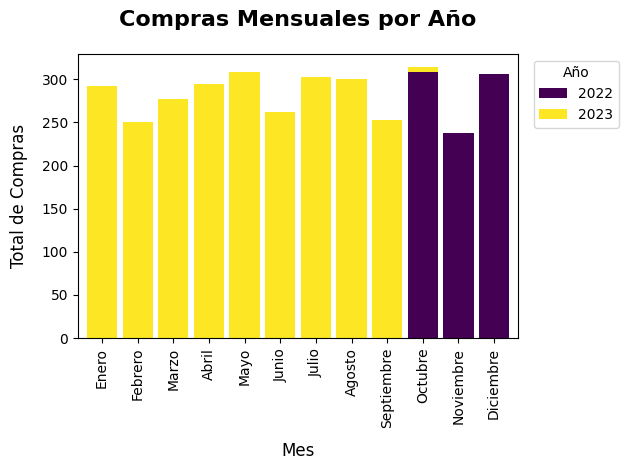

In [11]:
#Configuro el tamaño de la figura
plt.figure(figsize=(10,6))

# Agrupo los datos por año y mes contando el número de compra
compras_mes = datos_ventas.groupby(['Año Compra', 'Mes Compra']).size().unstack().fillna(0)

# Con esta linea se ordena las columnas según el mes
compras_mes = compras_mes[meses]

#Creo el gráfico
ax = compras_mes.T.plot(kind='bar', stacked=True, colormap='viridis', linewidth=0.5, width=0.85)

#Creo etiquetas para el gráfico
plt.title('Compras Mensuales por Año', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Mes', labelpad=10, fontsize=12)
plt.ylabel('Total de Compras', labelpad=10, fontsize=12)
plt.legend(title='Año', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Visualización Satisfacción del Cliente**

Finalmente creo la última visualización que indica las reseñas que hay por nivel de satisfacción del cliente, creando la barra del gráfico y agregando titulos y etiquetas.

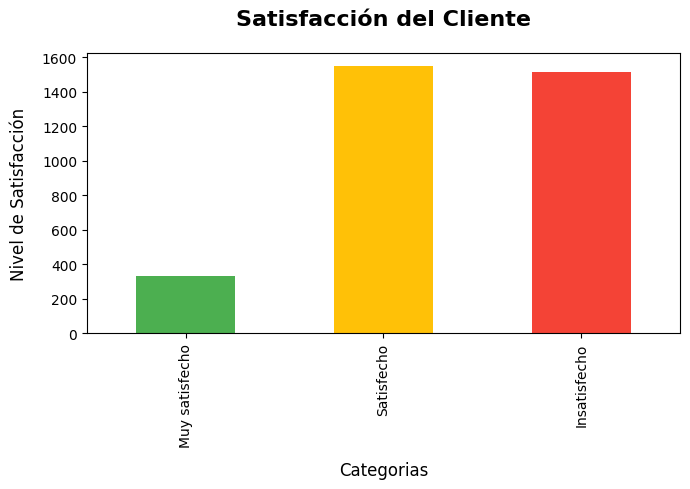

In [12]:
#Configuro el tamaño de la figura
plt.figure(figsize=(7,5))

# Preparo los datos de satisfacción y ordeno por las categorias con reindex
satisfaccion = datos_ventas['Nivel Satisfacción'].value_counts().reindex(categorias)

# Asigno colores a los diferentes niveles de satisfaccion:
colores = ['#4CAF50', '#FFC107', '#F44336']

#Creo el gráfico
ax = satisfaccion.T.plot(kind='bar', color=colores, linewidth=0.7)

#Creo etiquetas para el gráfico
plt.title('Satisfacción del Cliente', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Categorias', labelpad=10, fontsize=12)
plt.ylabel('Nivel de Satisfacción', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()
